In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [2]:
df=pd.read_csv("prl.csv")

In [19]:
df

,CCN ($cm^{-3}$),PM$_{2.5}$ ($\mu$ g m$^{-3}$),SS (%),Precipitation (mm day$^{-1}$),PC_PRD,Height (Re14-cb) (m)
DATE,,,,,,
2013/6/26,1043.916667,14.877976,0.134444,29.083333,3,2530.100000
2013/7/2,1065.000000,12.708333,0.120000,31.750000,7,2937.500000
2013/7/7,1210.466667,14.820000,0.200333,106.100000,4,2957.700000
2013/7/18,1260.500000,19.250000,0.203333,45.500000,4,3282.500000
2013/7/23,1105.750000,31.000000,0.202500,23.750000,3,6972.000000
2013/8/3,685.500000,12.966667,0.190000,357.500000,8,2192.750000
2013/8/19,660.250000,20.150000,0.197500,27.750000,3,1576.750000
2014/7/7,951.875000,38.333333,0.151250,23.666667,3,2287.375000
2014/7/10,1103.520833,23.930556,0.173958,93.125000,3,3019.133333


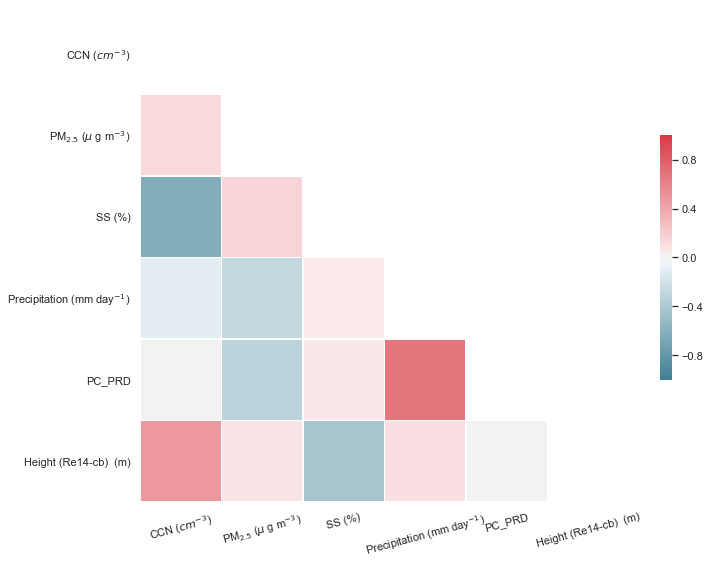

In [4]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=15)
plt.savefig("PRD_corr.png",dpi=600)

In [5]:
df=df[df["Precipitation (mm day$^{-1}$)"]>0]

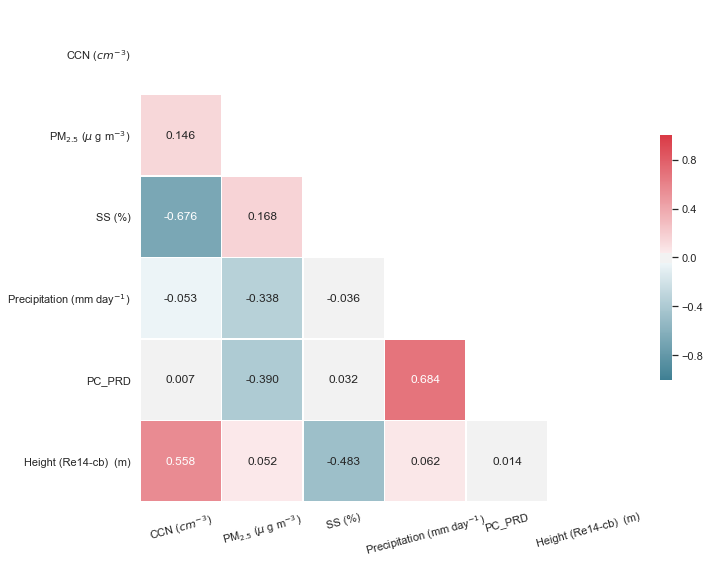

In [6]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt="0.3f")
plt.xticks(rotation=15)
plt.savefig("PRD_corr_num.png",dpi=600)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.set_index('DATE', inplace=True)

In [9]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile = "prd_profilerain.html")

In [10]:
pg.ttest(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,14.277,78,two-sided,1.842202e-23,"[711.31, 941.83]",3.192,1.315e+20,1.0


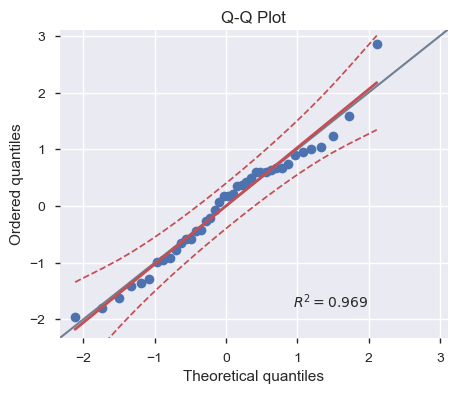

In [11]:
pg.qqplot(df["CCN ($cm^{-3}$)"], dist='norm')

In [12]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,-0.053,"[-0.36, 0.26]",0.003,-0.051,0.746024,0.207,0.062


In [13]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,-0.053,"[-0.36, 0.26]",0.003,-0.051,0.746024,0.207,0.062


In [14]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["SS (%)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,-0.676,"[-0.82, -0.46]",0.457,0.427,0.000002,1.221e+04,0.999


In [15]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Height (Re14-cb)  (m)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,0.558,"[0.3, 0.74]",0.312,0.274,0.000182,169.137,0.972


In [16]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,40,0.031,"[-0.28, 0.34]",0.001,-0.053,0.848702,0.054


In [17]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Precipitation (mm day$^{-1}$)', subject='PC_PRD')

C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\xigrug\Anaconda3\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a

AssertionError: 

In [39]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='PM$_{2.5}$ ($\mu$ g m$^{-3}$)', subject='PC_PRD')

,r,dof,pval,CI95%,power
rm_corr,0.687,14,0.003251,"[0.29, 0.88]",0.876


In [40]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='SS (%)', subject='PC_PRD')

,r,dof,pval,CI95%,power
rm_corr,-0.731,14,0.001283,"[-0.9, -0.37]",0.931


In [18]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Height (Re14-cb)  (m)', subject='PC_PRD')

AssertionError: 